### Задания по лекции 2. Полянчиков Владислав, АБД19-1м

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from PIL import Image
import matplotlib.pyplot as plt

from tensorflow import keras
import keras.layers as layers
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.optimizers import SGD

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from google.colab import drive
drive.mount('/content/gdrive')

from tensorflow.keras.models import load_model
model = load_model('./gdrive/My Drive/finuni/SNT/my_conv_model') # загрузка сохраненнлй модели
#model.save('./gdrive/My Drive/finuni/SNT/my_conv_model')


print("Setup Complete")

Found GPU at: /device:GPU:0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AG9YElTi3NjkndrU5KXOa3QuYnKp258jfRoIEIqgBPCGQWJ60_PrDA
Mounted at /content/gdrive
Setup Complete


### Задание 2
создайте многослойный персептрон и сверточную сеть для
классификации данных fashion_mnist (cifar10), оцените точность полученных
результатов и ошибки по классам. Сохраните модель, сохраните
наиболее эффективные веса.

### Задание 3. 
Продемонстрируйте работу обратных вызовов в процессе обучения

In [2]:
model = load_model('./gdrive/My Drive/finuni/SNT/my_conv_model_nadam')

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

[8]


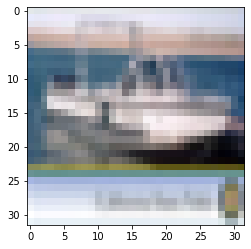

In [13]:
idx = 155
print(y_train[idx])
plt.imshow(X_train[idx]);

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
np.random.seed(42)

In [90]:
np.random.seed(42)
NB_EPOCH = 200 
BATCH_SIZE = 128 
VERBOSE = 1 
NB_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 


(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_test2 = X_test.copy()
y_test2 = y_test.copy()
y_train2 = y_train.copy()
# RESHAPED = 784
# X_train = X_train.reshape(60000, RESHAPED)
# X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

50000 train_samples
10000 test_samples


In [28]:
model = Sequential()
keras.Input(shape=(32,32,1)),
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(NB_CLASSES, activation='softmax'))

###### используются параметры выше, но клетка не активирована, так как я перезагружал блокнот, чтобы переставить на GPU для более быстрого обучения. После загрузил предварительно сохраненную модель из google drive

In [29]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics='accuracy')

model.fit(X_train, y_train, batch_size=250, epochs=15, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/15
140/140 [==============================] - 11s 77ms/step - loss: 1.9641 - accuracy: 0.2812 - val_loss: 1.6979 - val_accuracy: 0.4083
Epoch 2/15
140/140 [==============================] - 10s 74ms/step - loss: 1.5447 - accuracy: 0.4444 - val_loss: 1.4569 - val_accuracy: 0.5015
Epoch 3/15
140/140 [==============================] - 10s 74ms/step - loss: 1.3903 - accuracy: 0.5054 - val_loss: 1.3539 - val_accuracy: 0.5384
Epoch 4/15
140/140 [==============================] - 10s 74ms/step - loss: 1.2851 - accuracy: 0.5421 - val_loss: 1.2275 - val_accuracy: 0.5839
Epoch 5/15
140/140 [==============================] - 10s 74ms/step - loss: 1.2105 - accuracy: 0.5706 - val_loss: 1.1587 - val_accuracy: 0.6087
Epoch 6/15
140/140 [==============================] - 10s 75ms/step - loss: 1.1378 - accuracy: 0.5953 - val_loss: 1.1343 - val_accuracy: 0.6139
Epoch 7/15
140/140 [==============================] - 10s 74ms/step - loss: 1.0944 - accuracy: 0.6130 - val_loss: 1.0596 - val_accuracy:

###### После первых 15 эпох результат был в районе 20-30 % (SGD)
###### С Адамом - около 70%
###### С Адамом + Нестеровым - 71%

In [ ]:
model.fit(X_train, y_train, batch_size=150, epochs=30, verbose = 1, callbacks=[callback], validation_split=0.3)

In [ ]:
model.fit(X_train, y_train, batch_size=100, epochs=30, verbose = 1, callbacks=[callback], validation_split=0.3)

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.fit(X_train, y_train, batch_size=250, epochs=30, verbose = 1, callbacks=[callback], validation_split=0.3)

##### Первый callback!

In [34]:
model.fit(X_train, y_train, batch_size=500, epochs=30, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/30
70/70 [==============================] - 9s 133ms/step - loss: 0.5128 - accuracy: 0.8167 - val_loss: 0.6458 - val_accuracy: 0.7775
Epoch 2/30
70/70 [==============================] - 9s 131ms/step - loss: 0.5115 - accuracy: 0.8162 - val_loss: 0.6362 - val_accuracy: 0.7801
Epoch 3/30
70/70 [==============================] - 9s 131ms/step - loss: 0.5034 - accuracy: 0.8191 - val_loss: 0.6345 - val_accuracy: 0.7807
Epoch 4/30
70/70 [==============================] - 9s 131ms/step - loss: 0.5072 - accuracy: 0.8199 - val_loss: 0.6343 - val_accuracy: 0.7808
Epoch 5/30
70/70 [==============================] - 9s 131ms/step - loss: 0.5027 - accuracy: 0.8217 - val_loss: 0.6315 - val_accuracy: 0.7821
Epoch 6/30
70/70 [==============================] - 9s 131ms/step - loss: 0.5048 - accuracy: 0.8200 - val_loss: 0.6383 - val_accuracy: 0.7788
Epoch 7/30
70/70 [==============================] - 9s 131ms/step - loss: 0.5031 - accuracy: 0.8200 - val_loss: 0.6378 - val_accuracy: 0.7805
Epoch 

###### Кажется, выжали максимум. Можно сохранять.
Лучший результат на валидационной выборке - 77.07% (с оптимизатором SGD. Сейчас на том же месте прогоню с Адамом)

По итогу, Адам обучался быстрее, однако добился несколько худшего результата на валидационной выборке при прочих равных - 76.83%

Модель с оптимизатором Адама-Нестерова обучалась гораздо быстрее обеих предыдущих. Также быстрее случился первый коллбэк. Однако модель со временем начала переобучаться (я слегка изменил значения Дропаута). Имеет однозначно лучший показатель по потерям (vby 0.496 против 0.65 Адама), а также все показатели accuracy 82.4 % на train и 78.65 % на валидационной!

In [35]:
model.save('./gdrive/My Drive/finuni/SNT/my_conv_model_nadam')

INFO:tensorflow:Assets written to: ./gdrive/My Drive/finuni/SNT/my_conv_model_nadam/assets


In [136]:
model_adam = load_model('./gdrive/My Drive/finuni/SNT/my_conv_model_adam')
model = load_model('./gdrive/My Drive/finuni/SNT/my_conv_model')

In [137]:
np.random.seed(50)
pred_nadam = model.predict(X_test)
pred_adam = model_adam.predict(X_test)
pred_model1 = model1.predict(X_test)

pred_nadam = [np.argmax(i) for i in pred_nadam]
pred_adam = [np.argmax(i) for i in pred_adam]
pred_model1 = [np.argmax(i) for i in pred_model1]

In [138]:
y_train2

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [139]:
y_test2

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [140]:
from sklearn.metrics import accuracy_score
nadam_score = accuracy_score(pred_nadam, y_test2)
adam_score = accuracy_score(pred_adam, y_test2)
model1_score = accuracy_score(pred_model1, y_test2)

In [141]:
nadam_score, adam_score, model1_score

(0.7695, 0.7643, 0.7695)

In [142]:
import pandas as pd
results = pd.DataFrame()
results['Nadam'] = pred_nadam
results['Adam'] = pred_adam
results['Model1'] = pred_model1

In [143]:
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Nadam,3,8,8,0,6,6,1,6,3,1,0,9,5,7,9,8,5,7,8,6,7,0,4,9,4,5,3,0,9,6,6,5,4,3,9,3,4,1,9,5,...,0,3,4,0,4,2,6,3,5,6,2,9,4,0,1,7,5,5,4,3,0,4,6,0,7,3,8,0,8,4,7,0,3,3,3,3,3,5,4,7
Adam,3,8,8,8,6,6,1,6,3,1,5,9,5,7,9,8,5,7,8,6,7,0,4,9,4,2,4,0,9,6,6,5,4,3,9,3,5,9,9,5,...,0,9,4,8,4,2,6,3,5,6,2,9,4,8,1,7,5,5,4,3,0,4,6,0,7,3,8,8,8,4,7,0,3,3,3,3,5,5,1,7
Model1,3,8,8,0,6,6,1,6,3,1,0,9,5,7,9,8,5,7,8,6,7,0,4,9,4,5,3,0,9,6,6,5,4,3,9,3,4,1,9,5,...,0,3,4,0,4,2,6,3,5,6,2,9,4,0,1,7,5,5,4,3,0,4,6,0,7,3,8,0,8,4,7,0,3,3,3,3,3,5,4,7


In [144]:
from scipy.stats import mode

In [145]:
committee_score = accuracy_score(list(mode(results.T)[0])[0], y_test2)
committee_score

0.7695

In [153]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test2, pred_nadam)
conf_mx

array([[810,   5,  42,  17,  19,   4,   9,   3,  74,  17],
       [ 12, 854,   4,   6,   5,   4,   9,   1,  43,  62],
       [ 65,   1, 615,  73,  92,  57,  63,  15,  16,   3],
       [ 14,   3,  45, 652,  60, 125,  65,  17,  12,   7],
       [ 15,   1,  42,  53, 795,  22,  39,  25,   8,   0],
       [ 12,   1,  38, 209,  55, 641,  16,  22,   5,   1],
       [  4,   1,  39,  60,  30,  11, 851,   2,   2,   0],
       [ 14,   0,  42,  52,  81,  61,   7, 735,   1,   7],
       [ 42,   8,  10,  14,   5,   3,   4,   1, 900,  13],
       [ 36,  44,   7,  16,   7,   1,   8,   6,  33, 842]])

In [147]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

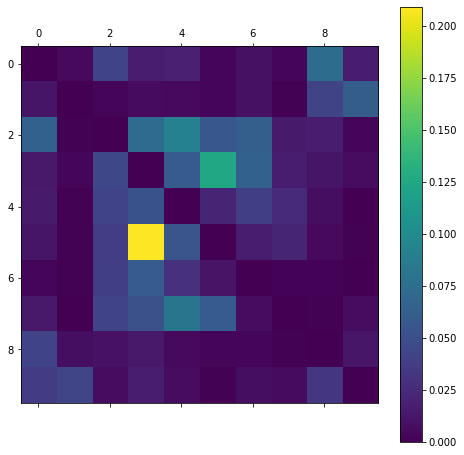

In [154]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)

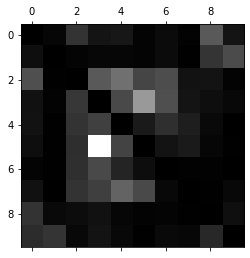

In [155]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

##### Чаще всего между собой путались 3 и 5

### CIFAR 100

In [14]:
load_model('./gdrive/My Drive/finuni/SNT/sifar100_nadam')

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from PIL import Image
import matplotlib.pyplot as plt

from tensorflow import keras
import keras.layers as layers
from keras.datasets import cifar10, cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.optimizers import SGD, Adam, Nadam
from keras import regularizers

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from google.colab import drive
drive.mount('/content/gdrive')

from tensorflow.keras.models import load_model
#model = load_model('./gdrive/My Drive/finuni/SNT/my_conv_model') # загрузка сохраненнлй модели
#model.save('./gdrive/My Drive/finuni/SNT/my_conv_model')


print("Setup Complete")

Found GPU at: /device:GPU:0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AGy4R4nCra80mz3Vg5AzFXY3n_nvsS3AR-hS4_ppB3ODTCTBQALKY0
Mounted at /content/gdrive
Setup Complete


In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


[29]


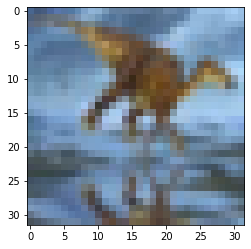

In [3]:
idx = 155
print(y_train[idx])
plt.imshow(X_train[idx]);

In [4]:
np.random.seed(42)
NB_EPOCH = 200 
BATCH_SIZE = 128 
VERBOSE = 1 
NB_CLASSES = 100
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 


(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_test2 = X_test.copy()
y_test2 = y_test.copy()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

In [5]:
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

50000 train_samples
10000 test_samples


In [78]:
np.random.seed(42)
weight_decay = 0.0005

model = Sequential()
keras.Input(shape=(32,32,1)),

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [79]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics='accuracy')

model.fit(X_train, y_train, batch_size=100, epochs=130, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/200
350/350 [==============================] - 26s 74ms/step - loss: 7.0399 - accuracy: 0.0242 - val_loss: 7.0774 - val_accuracy: 0.0193
Epoch 2/200
350/350 [==============================] - 26s 74ms/step - loss: 6.1484 - accuracy: 0.0500 - val_loss: 6.0468 - val_accuracy: 0.0385
Epoch 3/200
350/350 [==============================] - 26s 74ms/step - loss: 5.4996 - accuracy: 0.0790 - val_loss: 5.5634 - val_accuracy: 0.0607
Epoch 4/200
350/350 [==============================] - 26s 75ms/step - loss: 5.0298 - accuracy: 0.1023 - val_loss: 5.2760 - val_accuracy: 0.1048
Epoch 5/200
350/350 [==============================] - 26s 76ms/step - loss: 4.6109 - accuracy: 0.1348 - val_loss: 4.6055 - val_accuracy: 0.1517
Epoch 6/200
350/350 [==============================] - 27s 76ms/step - loss: 4.3377 - accuracy: 0.1600 - val_loss: 4.3864 - val_accuracy: 0.1541
Epoch 7/200
350/350 [==============================] - 27s 76ms/step - loss: 4.2421 - accuracy: 0.1796 - val_loss: 4.2735 - val_ac

In [82]:
model.save('./gdrive/My Drive/finuni/SNT/sifar100_nadam')

INFO:tensorflow:Assets written to: ./gdrive/My Drive/finuni/SNT/sifar100_nadam/assets


In [83]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model.fit(X_train, y_train, batch_size=100, epochs=130, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/130
350/350 [==============================] - 26s 74ms/step - loss: 3.1997 - accuracy: 0.5431 - val_loss: 3.3800 - val_accuracy: 0.5153
Epoch 2/130
350/350 [==============================] - 26s 74ms/step - loss: 3.1882 - accuracy: 0.5427 - val_loss: 3.6704 - val_accuracy: 0.4641
Epoch 3/130
350/350 [==============================] - 26s 74ms/step - loss: 3.1803 - accuracy: 0.5461 - val_loss: 3.5460 - val_accuracy: 0.4939
Epoch 4/130
350/350 [==============================] - 26s 75ms/step - loss: 3.1890 - accuracy: 0.5413 - val_loss: 3.6532 - val_accuracy: 0.4688
Epoch 5/130
350/350 [==============================] - 26s 76ms/step - loss: 3.1815 - accuracy: 0.5453 - val_loss: 3.5450 - val_accuracy: 0.4865
Epoch 6/130
350/350 [==============================] - 26s 76ms/step - loss: 3.1768 - accuracy: 0.5453 - val_loss: 3.5056 - val_accuracy: 0.4987
Epoch 7/130
350/350 [==============================] - 26s 76ms/step - loss: 3.1663 - accuracy: 0.5501 - val_loss: 3.5079 - val_ac

In [85]:
model.save('./gdrive/My Drive/finuni/SNT/sifar100_nadam_best')

INFO:tensorflow:Assets written to: ./gdrive/My Drive/finuni/SNT/sifar100_nadam_best/assets


In [86]:
model.fit(X_train, y_train, batch_size=150, epochs=50, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/50
234/234 [==============================] - 22s 96ms/step - loss: 2.6525 - accuracy: 0.6471 - val_loss: 3.0565 - val_accuracy: 0.5578
Epoch 2/50
234/234 [==============================] - 22s 93ms/step - loss: 2.5824 - accuracy: 0.6475 - val_loss: 3.1502 - val_accuracy: 0.5379
Epoch 3/50
234/234 [==============================] - 22s 94ms/step - loss: 2.5811 - accuracy: 0.6427 - val_loss: 3.0954 - val_accuracy: 0.5532
Epoch 4/50
234/234 [==============================] - 22s 95ms/step - loss: 2.5819 - accuracy: 0.6428 - val_loss: 3.0965 - val_accuracy: 0.5521
Epoch 5/50
234/234 [==============================] - 22s 95ms/step - loss: 2.5735 - accuracy: 0.6450 - val_loss: 3.1286 - val_accuracy: 0.5487
Epoch 6/50
234/234 [==============================] - 22s 96ms/step - loss: 2.5872 - accuracy: 0.6429 - val_loss: 3.2890 - val_accuracy: 0.5259
Epoch 7/50
234/234 [==============================] - 22s 96ms/step - loss: 2.6087 - accuracy: 0.6389 - val_loss: 3.1426 - val_accuracy:

In [87]:
model.save('./gdrive/My Drive/finuni/SNT/sifar100_nadam_best150')

INFO:tensorflow:Assets written to: ./gdrive/My Drive/finuni/SNT/sifar100_nadam_best150/assets


In [88]:
model.fit(X_train, y_train, batch_size=250, epochs=50, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/50
140/140 [==============================] - 19s 136ms/step - loss: 2.3658 - accuracy: 0.6939 - val_loss: 2.8541 - val_accuracy: 0.5895
Epoch 2/50
140/140 [==============================] - 19s 134ms/step - loss: 2.2204 - accuracy: 0.7149 - val_loss: 2.8973 - val_accuracy: 0.5747
Epoch 3/50
140/140 [==============================] - 19s 133ms/step - loss: 2.1875 - accuracy: 0.7135 - val_loss: 2.9136 - val_accuracy: 0.5692
Epoch 4/50
140/140 [==============================] - 19s 132ms/step - loss: 2.1577 - accuracy: 0.7172 - val_loss: 2.9232 - val_accuracy: 0.5715
Epoch 5/50
140/140 [==============================] - 19s 132ms/step - loss: 2.1569 - accuracy: 0.7105 - val_loss: 2.9900 - val_accuracy: 0.5673
Epoch 6/50
140/140 [==============================] - 19s 133ms/step - loss: 2.1697 - accuracy: 0.7080 - val_loss: 2.9326 - val_accuracy: 0.5721
Epoch 7/50
140/140 [==============================] - 19s 133ms/step - loss: 2.1780 - accuracy: 0.7044 - val_loss: 2.9716 - val_ac

In [89]:
model.save('./gdrive/My Drive/finuni/SNT/sifar100_nadam_best250')

INFO:tensorflow:Assets written to: ./gdrive/My Drive/finuni/SNT/sifar100_nadam_best250/assets


In [90]:
model.fit(X_train, y_train, batch_size=300, epochs=50, verbose = 1, callbacks=[callback], validation_split=0.3)

Epoch 1/50
117/117 [==============================] - 18s 157ms/step - loss: 2.1031 - accuracy: 0.7280 - val_loss: 2.8858 - val_accuracy: 0.5842
Epoch 2/50
117/117 [==============================] - 17s 147ms/step - loss: 2.0548 - accuracy: 0.7343 - val_loss: 2.8995 - val_accuracy: 0.5753
Epoch 3/50
117/117 [==============================] - 17s 148ms/step - loss: 2.0598 - accuracy: 0.7309 - val_loss: 2.9092 - val_accuracy: 0.5754
Epoch 4/50
117/117 [==============================] - 17s 149ms/step - loss: 2.0476 - accuracy: 0.7366 - val_loss: 2.9719 - val_accuracy: 0.5710
Epoch 5/50
117/117 [==============================] - 18s 150ms/step - loss: 2.0549 - accuracy: 0.7324 - val_loss: 2.9086 - val_accuracy: 0.5820
Epoch 6/50
117/117 [==============================] - 18s 151ms/step - loss: 2.0457 - accuracy: 0.7308 - val_loss: 2.9729 - val_accuracy: 0.5733
Epoch 7/50
117/117 [==============================] - 18s 152ms/step - loss: 2.0531 - accuracy: 0.7327 - val_loss: 2.8663 - val_ac

In [91]:
model.save('./gdrive/My Drive/finuni/SNT/sifar100_nadam_best300')

INFO:tensorflow:Assets written to: ./gdrive/My Drive/finuni/SNT/sifar100_nadam_best300/assets


In [6]:
model = load_model('./gdrive/My Drive/finuni/SNT/sifar100_nadam_best300')